In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx

In [119]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [120]:
df = pd.read_csv("Bakery.csv")
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [121]:
print("Database (Baris, Kolom)) :", df.shape)

Database (Baris, Kolom)) : (20507, 5)


In [122]:
print("\n".join(df.columns))


TransactionNo
Items
DateTime
Daypart
DayType


In [123]:
missing_values = df.isnull().sum()
missing_values.head()

,0
TransactionNo,0
Items,0
DateTime,0
Daypart,0
DayType,0


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [125]:
df.describe(include=object)

,Items,DateTime,Daypart,DayType
count,20507,20507,20507,20507
unique,94,9465,4,2
top,Coffee,2017-02-17 14:18:20,Afternoon,Weekday
freq,5471,11,11569,12807




*   count --> 20507: Menunjukkan jumlah total nilai non-NA di setiap kolom. Artinya, tidak ada nilai yang hilang dalam semua kolom
*   unique --> Items: 94
Ada 94 jenis item berbeda yang tercatat.
DateTime: 9465
Terdapat 9.465 tanggal dan waktu unik. Ini menunjukkan bahwa beberapa transaksi terjadi pada waktu yang sama.
Daypart: 4
Hanya ada 4 kategori waktu
DayType: 2
Ada dua tipe hari: misalnya, Weekday dan Weekend.


*   top --> Paling sering muncul.
Items: Coffee.
DateTime: 2017-02-17 14:18:20.
Daypart: Afternoon.
DayType: Weekday.
*   freq --> jumlah kemunculan top nilai dalam tiap kolom.
Item : 5471 (coffee)
DateTime: 11 (2017-02-17 14:18:20)
Daypart: 11569 (Afternoon)
DayType: 12807 (weekday)

Kesimpulan

- Mayoritas transaksi terjadi pada siang hari (Afternoon) dan hari kerja (Weekday).
- Coffee adalah item yang paling sering dipesan.



In [126]:
itemFrequency = df['Items'].value_counts().sort_values(ascending=False)
itemFrequency.head()

,count
Items,
Coffee,5471
Bread,3325
Tea,1435
Cake,1025
Pastry,856


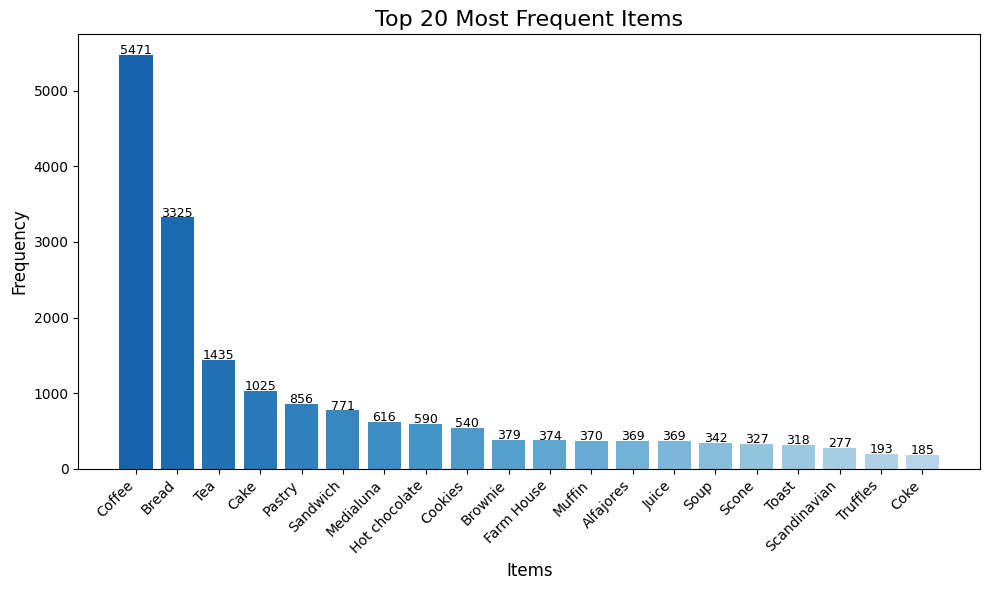

In [127]:
top_20_items = itemFrequency.head(20)
colors = plt.cm.Blues(np.linspace(0.8, 0.3, len(top_20_items)))
plt.figure(figsize=(10, 6))
plt.bar(top_20_items.index, top_20_items.values, color=colors)
plt.title('Top 20 Most Frequent Items', fontsize=16)
plt.xlabel('Items', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
for i, value in enumerate(top_20_items.values):
    plt.text(i, value + 10, str(value), ha='center', fontsize=9)
plt.tight_layout()
plt.show()


In [128]:
dateTime=pd.to_datetime(df['DateTime'])
df['Day']=dateTime.dt.day_name()
df['Month']=dateTime.dt.month_name()
df['Year']=dateTime.dt.year
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType,Day,Month,Year
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,Sunday,October,2016
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,Sunday,October,2016
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,Sunday,October,2016
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,Sunday,October,2016
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,Sunday,October,2016


In [129]:
py = df.groupby('Year')['Items'].count().sort_values(ascending=False)
py

,Items
Year,
2017,12363
2016,8144


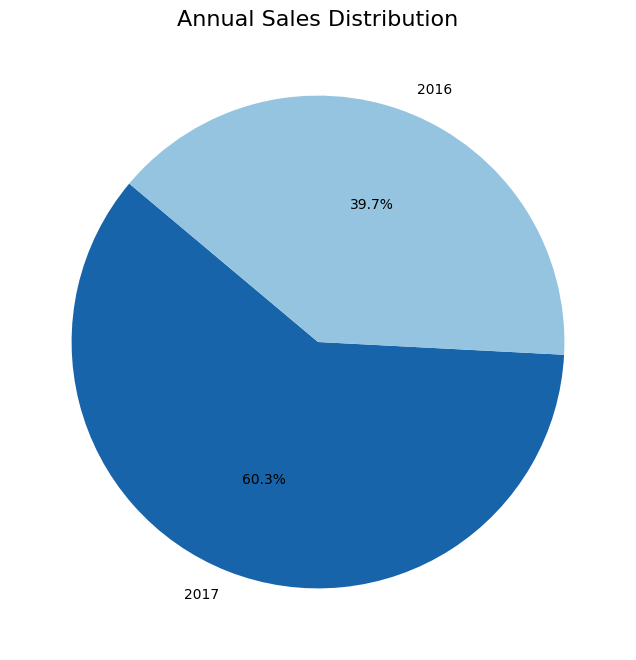

In [137]:
plt.figure(figsize=(8, 8))
plt.pie(py, labels=py.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Annual Sales Distribution', fontsize=16)
colors = plt.cm.Blues(np.linspace(0.8, 0.4, len(py)))
plt.show()

In [138]:
pm = df.groupby('Month')['Items'].count().sort_values(ascending=False)
pm

,Items
Month,
March,3220
November,3076
January,3027
February,2748
December,2647
April,1048
October,1041
May,924
July,741


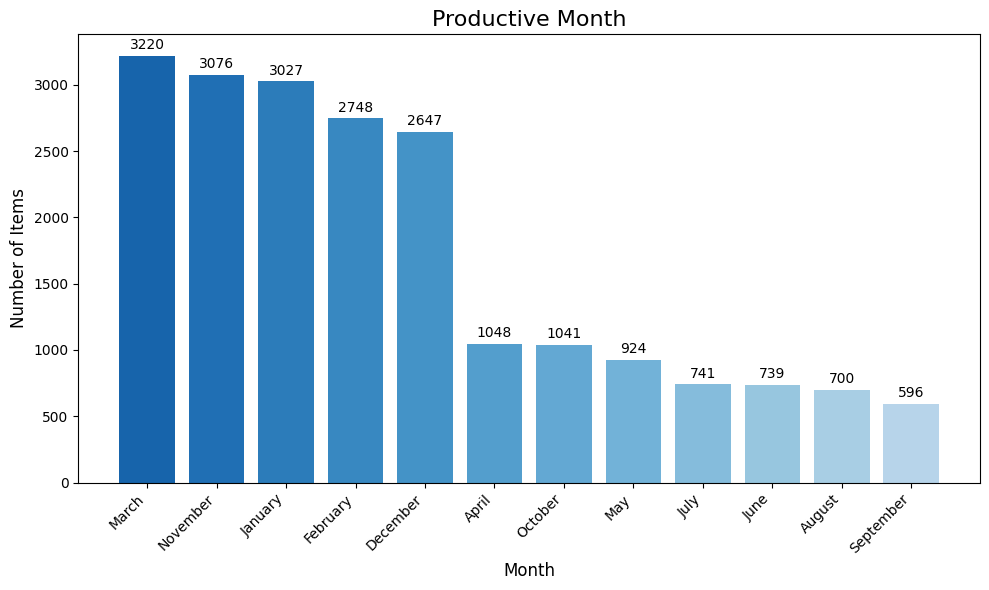

In [139]:
colors = plt.cm.Blues(np.linspace(0.8, 0.3, len(pm)))
plt.figure(figsize=(10, 6))
plt.bar(pm.index, pm.values, color=colors)
plt.title('Productive Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Items', fontsize=12)
for i, value in enumerate(pm.values):
    plt.text(i, value + 50, str(value), ha='center', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [140]:
pd = df.groupby('Day')['Items'].count().sort_values(ascending=False)
pd

,Items
Day,
Saturday,3554
Friday,3266
Sunday,3118
Monday,3035
Tuesday,2645
Thursday,2601
Wednesday,2288


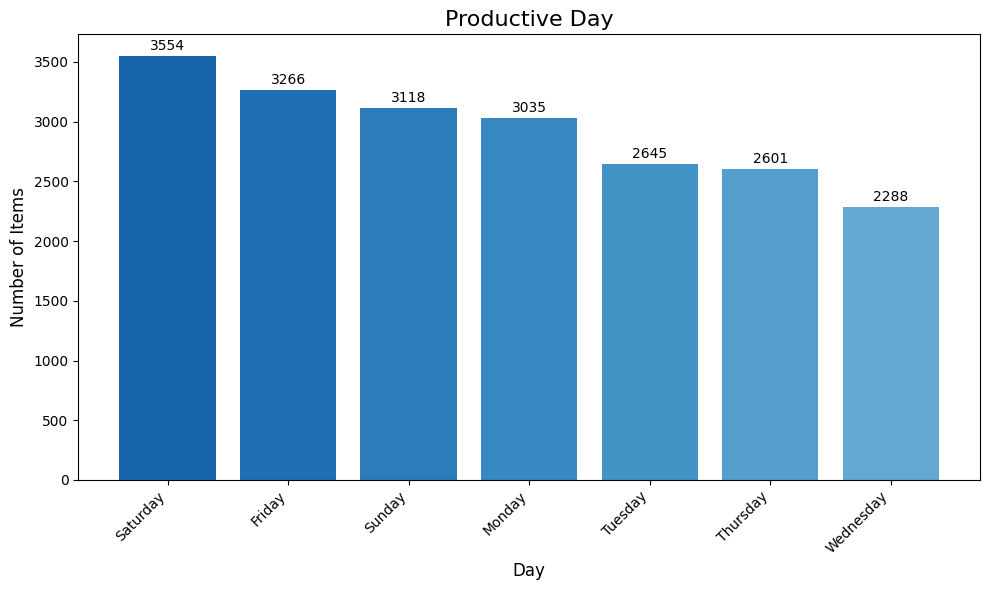

In [141]:
colors = plt.cm.Blues(np.linspace(0.8, 0.3, len(pm)))
plt.figure(figsize=(10, 6))
plt.bar(pd.index, pd.values, color=colors)
plt.title('Productive Day', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Number of Items', fontsize=12)
for i, value in enumerate(pd.values):
    plt.text(i, value + 50, str(value), ha='center', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [142]:
Daypart = df.groupby('Daypart')['Items'].count().sort_values(ascending=False)
Daypart.head()

,Items
Daypart,
Afternoon,11569
Morning,8404
Evening,520
Night,14


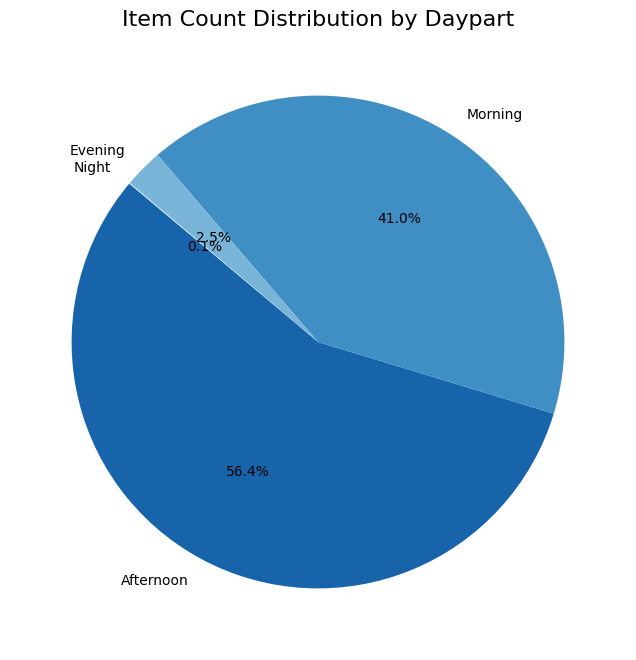

In [144]:
plt.figure(figsize=(8, 8))
plt.pie(Daypart, labels=Daypart.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Item Count Distribution by Daypart', fontsize=16)
colors = plt.cm.Blues(np.linspace(0.8, 0.3, len(Daypart)))
plt.show()

**EDA Summary**
- "Coffee" merupakan item yang paling laris, diikuti oleh "Bread" dan "Tea".
- Penjualan pada kuartal pertama dan kuartal ke empat cenderung tinggi (November-Maret).
- Sebagian besar transaksi terjadi di sore hari setiap hari dengan lebih dari 56% penjualan. Kemudian pada pagi hari transaksi yang terjadi cenderung tinggi sebesar 41%. Sementara itu penjualan turun tajam pada malam hari.
- Pada bulan November hingga Maret penjualan toko tinggi.

**Association Rules Generation**

In [151]:
for item in df['TransactionNo'].unique():
    list_item = list(set(df[df['TransactionNo'] == item]['Items']))
    transactions.append(list_item)
transactions[0:5]


[['Bread'],
 ['Scandinavian'],
 ['Hot chocolate', 'Cookies', 'Jam'],
 ['Muffin'],
 ['Pastry', 'Bread', 'Coffee']]

In [152]:
frequent_itemsets = apriori(data, min_support=0.02, use_colnames=True)
print(frequent_itemsets.head())


    support     itemsets
0  0.036344  (Alfajores)
1  0.327205      (Bread)
2  0.040042    (Brownie)
3  0.103856       (Cake)
4  0.478394     (Coffee)


In [164]:
num_items = frequent_itemsets['itemsets'].apply(len).max()
association_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, num_itemsets=num_items)
# rules
print(association_rules.head())

  antecedents consequents  antecedent support  consequent support   support  \
0    (Pastry)     (Bread)            0.086107            0.327205  0.029160   
1     (Bread)    (Pastry)            0.327205            0.086107  0.029160   
2      (Cake)    (Coffee)            0.103856            0.478394  0.054728   
3    (Coffee)      (Cake)            0.478394            0.103856  0.054728   
4       (Tea)      (Cake)            0.142631            0.103856  0.023772   

   confidence      lift  representativity  leverage  conviction  \
0    0.338650  1.034977               1.0  0.000985    1.017305   
1    0.089119  1.034977               1.0  0.000985    1.003306   
2    0.526958  1.101515               1.0  0.005044    1.102664   
3    0.114399  1.101515               1.0  0.005044    1.011905   
4    0.166667  1.604781               1.0  0.008959    1.075372   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.036980  0.075908   0.017011    0.213884  
1       0.050231  

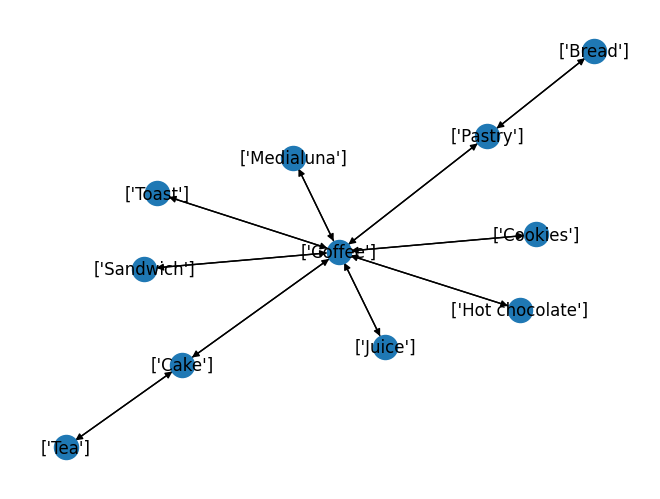

In [167]:
G = nx.DiGraph()
for index, row in association_rules.iterrows():
    antecedents = list(row['antecedents'])
    consequents = list(row['consequents'])
    G.add_edge(str(antecedents), str(consequents))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

**Insight**
- Coffee adalah item yang paling sering dibel dan berkaitan dengan 8 produk lainnya. Berdasarkan data tersebut tercatat bahwa "Coffee" dan "cake" sering dibeli secara bersamaan.



**insights for business strategy**

- Target Promosi: Buat promosi yang menggabungkan "coffee" dan "cake" untuk mendorong pembelian tambahan. atau pada item lain yang keterikatannya kuat.
- Penempatan Produk: Posisikan "coffee" dan "cake" berdekatan satu sama lain untuk meningkatkan kemungkinan pembelian bersama.
- Rekayasa Menu: Buat penawaran paket kombo pada item yang keterkaitannya kuat.
